In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, kstest


# Latar Belakang

Salah satu e-commerce terbesar di pakistan memiliki data penjualan produk mereka dari tahun 2016 sampai 2018, data ini terdiri dari 1048575 baris dan 26 kolom data.
d`Disini kita akan melakukan analisis data yang dimiliki oleh e-commerce tersebut dengan mencari :
- Melihat pertumbuhan penjualan produk dari tahun 2016 sampai 2018
- Mencari produk yang paling banyak terjual dan di batalkan pada periode 2016 sampai 2018
- Metode pembayaran apakah yang paling banyak di gunakan di e-commerce tersebut
- Rata-rata diskon yang diberikan berdasarkan metode pembayaran nya
- Apakah Metode pembayaran dan diskon yang diberikan berpengaruh terhadap produk yang terjual


# DATA

In [4]:
# Memasukan Data
df=pd.read_csv('Pakistan Largest Ecommerce Dataset.csv')
display(df.head(),df.tail())

C:\Users\asus\AppData\Local\Temp\ipykernel_15548\1688790157.py:2: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Pakistan Largest Ecommerce Dataset.csv')


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Melihat Jumlah Baris dan kolom
df.shape

(1048575, 26)

In [6]:
# Mencari Missing Value berdasarkan persentase :
df.isna().sum()/df.shape[0]*100

item_id                   44.255394
status                    44.256825
created_at                44.255394
sku                       44.257302
price                     44.255394
qty_ordered               44.255394
grand_total               44.255394
increment_id              44.255394
category_name_1           44.271034
sales_commission_code     57.337434
discount_amount           44.255394
payment_method            44.255394
Working Date              44.255394
BI Status                 44.255394
 MV                       44.255394
Year                      44.255394
Month                     44.255394
Customer Since            44.256443
M-Y                       44.255394
FY                        44.255394
Customer ID               44.256443
Unnamed: 21              100.000000
Unnamed: 22              100.000000
Unnamed: 23              100.000000
Unnamed: 24              100.000000
Unnamed: 25              100.000000
dtype: float64

Berdasarkan data di atas terdapat banyak missing value, di setiap kolom hampir 50% nya terutama 5 kolom terakhir. Maka dari itu akan kita bersihkan dahulu missing value di atas.

# Data Cleaning

Untuk membersihkan missing value baik itu nilai nya kosong, salah penulisan atau pun nilai nya tidak ada keterkaitan di dalam dataframe tersebut, maka untuk membersihkan nya menggunakan 2 cara :
1. Menghapus atau men drop baris atau kolom yang terdapat missing values nya
2. Mengganti nilai yang ada pada baris maupun kolom dengan nilai yang terkait dengan dataframe tersebut



### Menghapus 5 Kolom Terakhir karena semua isinya Nan :

5 Kolom terakhir dari dataframe di atas masing-masing di tiap baris dan kolom nya memiliki nilai yang kosong sehingga lebih baik kita hapus atau di drop

In [7]:
df = df.drop(['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis=1)

### Menghapus kolom 'Working Date','Customer Since', 'M-Y' dan 'FY' karena isi nya bisa diwakilkan dengan kolom 'created_at','Year' dan 'Month'

Pada kolom 'Working Date','Customer Since', 'M-Y' dan 'FY' memiliki nilai yang sama dan bisa di wakilkan dengan kolom 'created_at','Year' dan 'Month' karena isi nilai nya berkisar antara tanggal bulan dan tahun, maka dari itu kolom 'Working Date','Customer Since', 'M-Y' dan 'FY' akan kita hapus atau drop.

In [8]:
df = df.drop(['Working Date','Customer Since', 'M-Y', 'FY'], axis=1)

### Menghapus baris yang semua isi nya NaN :

Dalam dataframe di atas terdapat baris yang semua isi pada tiap kolom nya kosong sehingga akan lebih bagus apabila kita hapus atau di drop.

In [9]:
df = df.dropna(axis=0, how='all')

In [10]:
# Mencari lagi Missing Values
df.isna().sum()

item_id                       0
status                       15
created_at                    0
sku                          20
price                         0
qty_ordered                   0
grand_total                   0
increment_id                  0
category_name_1             164
sales_commission_code    137175
discount_amount               0
payment_method                0
BI Status                     0
 MV                           0
Year                          0
Month                         0
Customer ID                  11
dtype: int64

In [11]:
# Mencari missing value di kolom 'status'
df[df['status'].isna()]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,BI Status,MV,Year,Month,Customer ID
477519,783751.0,NaN,3/15/2018,OTHPCB5A7D8A0BD10E8,8000.0,1.0,8000.0,100479380,Others,NaN,0.0,cod,Gross,"8,000",2018.0,3.0,95141.0
513736,827187.0,NaN,4/16/2018,KABOXF5ABCC75C7E2F7-32,370.0,1.0,2707.0,100513933,Kids & Baby,NaN,0.0,cod,Gross,370,2018.0,4.0,105059.0
513737,827189.0,NaN,4/16/2018,KABSHO5AA77C331466F-11-13 Years,473.0,1.0,2707.0,100513933,Kids & Baby,NaN,0.0,cod,Gross,473,2018.0,4.0,105059.0
513738,827191.0,NaN,4/16/2018,KABBIN5A93E074C501A-8-9 Years,749.0,1.0,2707.0,100513933,Kids & Baby,NaN,0.0,cod,Gross,749,2018.0,4.0,105059.0
513739,827193.0,NaN,4/16/2018,KABLIT59AC117FD51C4-12-13 Years,692.0,1.0,2707.0,100513933,Kids & Baby,NaN,0.0,cod,Gross,692,2018.0,4.0,105059.0
513740,827195.0,NaN,4/16/2018,KABCOL5AB2B8019805C-8-9 Years,423.0,1.0,2707.0,100513933,Kids & Baby,NaN,0.0,cod,Gross,423,2018.0,4.0,105059.0
518706,832777.0,NaN,4/30/2018,ENTCLI5A5DD7D800D6E,6042.0,1.0,6042.0,100517141,Entertainment,NaN,0.0,cod,Gross,"6,042",2018.0,4.0,106036.0
532965,848003.0,NaN,5/14/2018,MATINF5AE310D2D7A1A,13950.0,1.0,13950.0,100527966,Mobiles & Tablets,NaN,0.0,cod,Gross,"13,950",2018.0,5.0,105319.0
542146,857829.0,NaN,5/25/2018,ROO5AE983F2751EA,2280.0,1.0,2280.0,100534786,Superstore,NaN,0.0,cod,Gross,"2,280",2018.0,5.0,109580.0
554962,872154.0,NaN,6/15/2018,BAGPHI5AA665985A58E,2900.0,1.0,949.0,100542483,Beauty & Grooming,NaN,200.0,bankalfalah,Gross,"2,900",2018.0,6.0,109420.0


In [12]:
# Mencari hubungan antara kolom 'BI Status' dan 'status'
df.groupby('BI Status')['status'].value_counts()

BI Status  status        
#REF!      complete               1
Gross      canceled          201249
           payment_review        57
           pending               48
           processing            33
           holded                31
           fraud                 10
           pending_paypal         7
           \N                     4
Net        complete          233684
           closed               494
Valid      received           77290
           order_refunded     59529
           refund              8050
           cod                 2859
           paid                1159
           exchange               4
Name: status, dtype: int64

### Menangani missing values di kolom 'status'

Pada kolom status terdapat missing value berupa nilai yang kosong dan penulisan nilai yang tidak ada keterkaitan dengan kolom tersebut. sehingga untuk nilai yang kosong kita masukan nilai yang paling banyak muncul (modus) yaitu 'complete' dan untuk nilai yang penulisan nya '\N' kita masukan dengan nilai 'canceled' karena melihat 'BI Status' nya ada pada nilai'Gross' dan paling banyak di isi 'canceled'.

karena terlalu banyak nilai pada kolom 'status' maka akan lebih baik kita persempit nilai nya menjadi 2 nilai yaitu 'complete' dan 'canceled'

In [13]:
df['status'] = df['status'].fillna('complete')
df['status'] = df['status'].replace('payment_review', 'complete', regex=True)
df['status'] = df['status'].replace('pending', 'complete', regex=True)
df['status'] = df['status'].replace('processing', 'complete', regex=True)
df['status'] = df['status'].replace('holded', 'complete', regex=True)
df['status'] = df['status'].replace('pending_paypal', 'complete', regex=True)
df['status'] = df['status'].replace('closed', 'complete', regex=True)
df['status'] = df['status'].replace('received', 'complete', regex=True)
df['status'] = df['status'].replace('cod', 'complete', regex=True)
df['status'] = df['status'].replace('paid', 'complete', regex=True)
df['status'] = df['status'].replace('exchange', 'complete', regex=True)
df['status'] = df['status'].replace('complete_paypal', 'complete', regex=True)
df['status'] = df['status'].replace('fraud', 'canceled', regex=True)
df['status'] = df['status'].replace('order_refunded', 'canceled', regex=True)
df['status'] = df['status'].replace('refund', 'canceled', regex=True)
df['status'] = df['status'].replace(r'\\N', 'canceled', regex=True)

In [14]:
# Nilai pada kolom 'status' menjadi 2 nilai
df['status'].unique()

array(['complete', 'canceled'], dtype=object)

### Menangani missing value di kolom 'BI Status'

Untuk missing values di kolom 'BI Status' ada pada nilai '#REF' yang nilainya membingungkan, maka dari itu kita akan mengubah nilainya menjadi nilai 'Net'. Karena nilai '#REF' di kolom 'status' bernilai 'complete' dan nilai 'complete' pada kolom 'BI Status' bernilai 'Net'

In [15]:
df.loc[df['BI Status']=='#REF!','BI Status']='Net'

In [16]:
# Mencari missing value di kolom 'sku'
df[df['sku'].isna()]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,BI Status,MV,Year,Month,Customer ID
14846,230008.0,canceled,8/13/2016,NaN,0.0,1.0,0.0,100160070,\N,\N,0.0,cod,Gross,-,2016.0,8.0,3468.0
20676,236830.0,canceled,9/1/2016,NaN,0.0,1.0,0.0,100164902,\N,\N,0.0,cod,Gross,-,2016.0,9.0,4369.0
39838,260006.0,canceled,10/7/2016,NaN,0.0,1.0,0.0,100181136,\N,\N,0.0,cod,Gross,-,2016.0,10.0,939.0
39839,260007.0,canceled,10/7/2016,NaN,0.0,3.0,0.0,100181137,\N,\N,0.0,cod,Gross,-,2016.0,10.0,939.0
39880,260061.0,canceled,10/7/2016,NaN,0.0,3.0,0.0,100181174,\N,\N,0.0,cod,Gross,-,2016.0,10.0,939.0
124968,367292.0,canceled,12/10/2016,NaN,0.0,1.0,0.0,100247863,\N,\N,0.0,cod,Valid,-,2016.0,12.0,26305.0
125636,368122.0,canceled,12/12/2016,NaN,0.0,1.0,0.0,100248364,\N,\N,0.0,cod,Valid,-,2016.0,12.0,2246.0
125811,368362.0,canceled,12/13/2016,NaN,0.0,1.0,0.0,100248497,\N,\N,0.0,cod,Valid,-,2016.0,12.0,251.0
149597,399798.0,canceled,2/7/2017,NaN,0.0,1.0,0.0,100267148,\N,\N,0.0,cod,Valid,-,2017.0,2.0,33062.0
170249,426105.0,canceled,3/21/2017,NaN,0.0,1.0,6952.0,100281645,\N,\N,0.0,cod,Gross,-,2017.0,3.0,38242.0


In [17]:
# Mencari nilai yang sering muncul di kolom 'sku'
df['sku'].mode()

0    MATSAM59DB75ADB2F80
Name: sku, dtype: object

### Menanngani missing value di kolom 'sku'

Pada kolom 'sku' terdapat nilai kosong sehingga kita akan mengisi nilai kosong tersebut dengan nilai yang sering muncul dalam kolom 'sku'.
dan nilai yang sering muncul adalah 'MATSAM59DB75ADB2F80'

In [18]:
df['sku']=df['sku'].fillna('MATSAM59DB75ADB2F80')

In [19]:
# Mencari missing value di kolom 'category_name_1'
df[df['category_name_1'].isna()]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,BI Status,MV,Year,Month,Customer ID
425895,725194.0,canceled,1/2/2018,MEFQMO59B0942707B79-L,99.0,2.0,2.0,100442474,NaN,NaN,346.0,Easypay,Valid,198,2018.0,1.0,59587.0
431194,731122.0,complete,1/15/2018,MEFQMO59B0942707B79-M,99.0,1.0,249.0,100445690,NaN,NaN,0.0,cod,Valid,99,2018.0,1.0,59587.0
432492,732569.0,canceled,1/19/2018,MEFQMO59B0942707B79-M,99.0,1.0,249.0,100446481,NaN,NaN,0.0,bankalfalah,Gross,99,2018.0,1.0,37311.0
432494,732572.0,canceled,1/19/2018,MEFQMO59B0942707B79-M,99.0,1.0,249.0,100446483,NaN,NaN,0.0,bankalfalah,Gross,99,2018.0,1.0,37311.0
432496,732575.0,canceled,1/19/2018,MEFQMO59B0942707B79-M,99.0,1.0,249.0,100446485,NaN,NaN,0.0,cod,Valid,99,2018.0,1.0,85633.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535572,850761.0,complete,5/16/2018,KABASA5ABC763F62E76,506.0,1.0,656.0,100530038,NaN,NaN,0.0,cod,Valid,506,2018.0,5.0,108622.0
541927,857600.0,complete,5/25/2018,WOFASA5AE962A6DD038,199.0,1.0,1344.0,100534649,NaN,NaN,0.0,cod,Valid,199,2018.0,5.0,2237.0
549314,865823.0,canceled,6/4/2018,MEFQMO59B0942707B79-M,99.0,1.0,249.0,100538795,NaN,NaN,0.0,Easypay,Gross,99,2018.0,6.0,85385.0
568069,886699.0,canceled,7/18/2018,COMWD5AA8FF5851E73,314.0,1.0,464.0,100551503,NaN,NaN,0.0,easypay_voucher,Gross,314,2018.0,7.0,113144.0


In [20]:
# Mencari nilai yang sering muncul di kolom 'category_name_1'
df['category_name_1'].mode()

0    Mobiles & Tablets
Name: category_name_1, dtype: object

In [21]:
# Melihat nilai unique pada kolom 'category_name_1'
df['category_name_1'].unique()

array(["Women's Fashion", 'Beauty & Grooming', 'Soghaat',
       'Mobiles & Tablets', 'Appliances', 'Home & Living',
       "Men's Fashion", 'Kids & Baby', '\\N', 'Others', 'Entertainment',
       'Computing', 'Superstore', 'Health & Sports', 'Books',
       'School & Education', nan], dtype=object)

### Menangani missing value pada kolom 'category_name_1'

Terdapat nilai dan nama kolom yang harus di perbaiki :
1. Mengganti nama kolom 'category_name_1' menjadi 'category name'
2. Mengisi nilai kosong dengan nilai yang sering muncul, yaitu 'Mobiles & Tablets'.
3. Mengganti nilai '\N' di kolom 'category_name_1' dengan nilai 'Others' karena nilai nya membingungkan.
4. Mengganti nilai 'nan]' di kolom 'category_name_1' dengan nilai 'Others' karena salah penulisan dan nilainya membingungkan.

In [22]:
df['category_name_1']=df['category_name_1'].fillna('Mobiles & Tablets')
df['category_name_1'] = df['category_name_1'].replace(r'\\N', 'Others', regex=True)
df['category_name_1'] = df['category_name_1'].replace('nan]', 'Others', regex=True)
df.rename(columns=({'category_name_1':'category name'}),inplace=True)

In [23]:
# Mencari miising values yang tersisa
df.isna().sum()

item_id                       0
status                        0
created_at                    0
sku                           0
price                         0
qty_ordered                   0
grand_total                   0
increment_id                  0
category name                 0
sales_commission_code    137175
discount_amount               0
payment_method                0
BI Status                     0
 MV                           0
Year                          0
Month                         0
Customer ID                  11
dtype: int64

In [24]:
# Melihat missing value di kolom 'sales_commission_code'
df[df['sales_commission_code'].isna()]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category name,sales_commission_code,discount_amount,payment_method,BI Status,MV,Year,Month,Customer ID
135887,381711.0,complete,1/4/2017,jockey_J260-1013-3-M,715.0,1.0,1714.0,100256851,Men's Fashion,NaN,0.0,cod,Net,715,2017.0,1.0,11660.0
135888,381713.0,complete,1/4/2017,BO_nonRC-Jeep-Silver,250.0,1.0,1714.0,100256851,Kids & Baby,NaN,0.0,cod,Net,250,2017.0,1.0,11660.0
135889,381714.0,complete,1/4/2017,aybeez_ABZ-3338-M,299.0,1.0,1714.0,100256851,Men's Fashion,NaN,0.0,cod,Net,299,2017.0,1.0,11660.0
135890,381716.0,complete,1/4/2017,PC_3P COMBED-008,450.0,1.0,1714.0,100256851,Men's Fashion,NaN,0.0,cod,Net,450,2017.0,1.0,11660.0
281723,557053.0,complete,8/10/2017,JSM_JSM-003-ComboGreenWhitePakShirt-M,180.0,2.0,360.0,100345578,Others,NaN,0.0,cod,Net,360,2017.0,8.0,17022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,905204.0,complete,8/28/2018,WOFSCE5AE00357AECDE,699.0,1.0,849.0,100562385,Women's Fashion,NaN,0.0,cod,Valid,699,2018.0,8.0,115320.0
584520,905205.0,complete,8/28/2018,MATHUA5AF70A7D1E50A,35599.0,1.0,35899.0,100562386,Mobiles & Tablets,NaN,0.0,bankalfalah,Gross,"35,599",2018.0,8.0,115326.0
584521,905206.0,complete,8/28/2018,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,0.0,bankalfalah,Gross,"259,998",2018.0,8.0,113474.0
584522,905207.0,complete,8/28/2018,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,0.0,bankalfalah,Gross,"174,600",2018.0,8.0,113474.0


In [25]:
# Melihat jumlah baris berdasarkan nilai di kolom 'sales_commission_code'
df['sales_commission_code'].value_counts()

\N                339001
40968               2710
C-LHW-50074         2434
C-RWP-31924         1720
cisb30211           1613
                   ...  
100278139              1
rwp-wah-104124         1
C-FSD-42199            1
Cfsd43702              1
C LHE 45016            1
Name: sales_commission_code, Length: 7226, dtype: int64

### Menangani missing values pada kolom 'sales_commission_code'

Untuk kolom 'sales_commission_code' terdapat missing value dengan nilai kosong yang berjumlah 137175 baris, karena terlalu banyak maka kita akan membuat sebuah nilai baru untuk mengisi nya yaitu dengan nilai 'Unknown'. Kemudian ada missing values dengan nilai '\N', karena terlalu banyak juga kita akan mengisinya dengan nilai 'Unknown'

In [26]:
df['sales_commission_code'] = df['sales_commission_code'].fillna('Unknown')
df['sales_commission_code'] = df['sales_commission_code'].replace(r'\\N', 'Unknown', regex=True)

In [27]:
# Mencari missing values pada kolom 'Customer ID'
df[df['Customer ID'].isna()]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category name,sales_commission_code,discount_amount,payment_method,BI Status,MV,Year,Month,Customer ID
427377,726862.0,canceled,1/5/2018,BAGLOR5A12C5C756AE5,209.0,1.0,1074.0,100443451,Beauty & Grooming,Unknown,0.0,cod,Valid,209,2018.0,1.0,NaN
427378,726863.0,canceled,1/5/2018,WOFGUL59C24CC9BE5D9,720.0,1.0,1074.0,100443451,Women's Fashion,Unknown,0.0,cod,Valid,720,2018.0,1.0,NaN
427379,726864.0,canceled,1/5/2018,BAGNAD59E0AAC250E6D,145.0,1.0,1074.0,100443451,Beauty & Grooming,Unknown,0.0,cod,Valid,145,2018.0,1.0,NaN
437567,738191.0,canceled,1/31/2018,MEFMUN5A0ACC3A894BE-9,999.0,1.0,1149.0,100449683,Men's Fashion,Unknown,0.0,cod,Valid,999,2018.0,1.0,NaN
478699,784981.0,complete,3/15/2018,OTHPCB5A7D8A0DA56C6,8000.0,2.0,16000.0,100480546,Others,Unknown,0.0,Payaxis,Valid,"16,000",2018.0,3.0,NaN
478779,785061.0,canceled,3/15/2018,OTHPCB5A7D8A0DA56C6,8000.0,2.0,16000.0,100480623,Others,Unknown,0.0,Easypay_MA,Gross,"16,000",2018.0,3.0,NaN
494278,804621.0,canceled,3/27/2018,OTHPCB5AB351ED6A8F2,5000.0,2.0,10000.0,100496269,Others,Unknown,0.0,Easypay,Gross,"10,000",2018.0,3.0,NaN
495340,805750.0,canceled,3/27/2018,OTHPCB5AB351ECC7118,500.0,2.0,1000.0,100497359,Others,Unknown,0.0,Easypay,Gross,"1,000",2018.0,3.0,NaN
495945,807010.0,canceled,3/27/2018,OTHPCB5AB351EEC46EC,500.0,4.0,2000.0,100498582,Others,Unknown,0.0,Easypay,Gross,"2,000",2018.0,3.0,NaN
496921,808287.0,canceled,3/27/2018,MEFKAR5A7C138CE9EBD-L,1040.0,1.0,1040.0,100499821,Men's Fashion,Unknown,0.0,cod,Valid,"1,040",2018.0,3.0,NaN


### Mennangani missing value pada kolom 'Customer ID'

Untuk missing values di kolom ini kita akan hapus atau di drop, karena nilainya tidak bisa di isi dengan nilai yang sama

In [28]:
df.dropna(axis=0,inplace=True)

### Data Sudah Tidak ada missing values

In [29]:
df.isna().sum()

item_id                  0
status                   0
created_at               0
sku                      0
price                    0
qty_ordered              0
grand_total              0
increment_id             0
category name            0
sales_commission_code    0
discount_amount          0
payment_method           0
BI Status                0
 MV                      0
Year                     0
Month                    0
Customer ID              0
dtype: int64

In [30]:
# Jumlah baris dan kolom yang sudah di bersihkan dari missing values
df.shape

(584513, 17)

# Hasil Data Cleaning

Sebelum dibersihkan, kita memiliki 1.048.575 baris dan 26 kolom data, sekarang kita memiliki 584.513 baris dan 17 kolom data. Sekitar 464.062 baris dan 9 kolom data yang kosong maupun tidak relevan di hapus atau di ganti dengan nilai yang relevan.

# Data Analysis
Setelah melakukan data cleaning pada data di atas, sekarang kita bisa melakukan analsis menggunakan data yang sudah bersih  

## Jumlah Transaksi pada tahun 2016, 2017 dan 2018

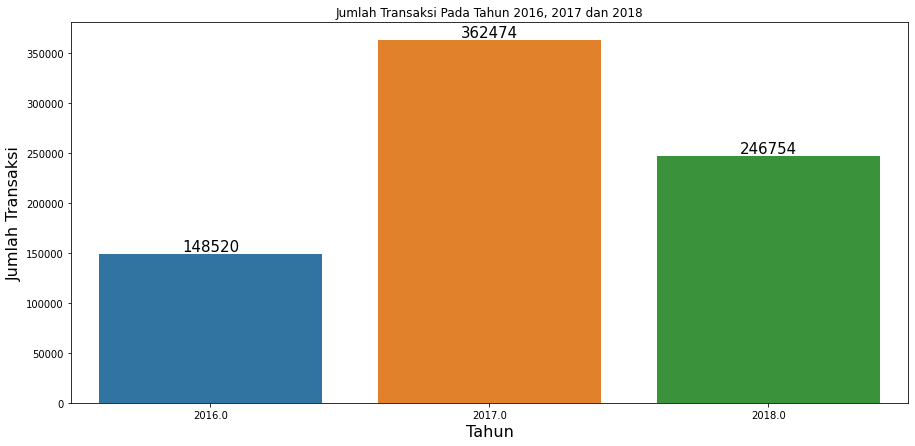

In [61]:
plt.figure(figsize=(15, 7))

ax = sns.barplot(data=df, x='Year', y='qty_ordered', ci=0 ,estimator=sum) 

for bar in ax.patches:
	ax.annotate(format(bar.get_height(), '.0f'),
				  (bar.get_x() + bar.get_width() / 2,
					bar.get_height()), 
                    ha='center', 
                    va='center',
				    size=15, xytext=(0, 8),
				    textcoords='offset points')

plt.title('Jumlah Transaksi Pada Tahun 2016, 2017 dan 2018')

plt.xlabel('Tahun', size=16)
plt.ylabel('Jumlah Transaksi', size=16)

plt.yticks(ticks=range(0,400000,50000),size=10)

plt.show() 

In [32]:
# Mencari Jumlah Transaksi tiap tahun
df6 = df[df['Year'] == 2016]['qty_ordered'].sum()
df7 = df[df['Year'] == 2017]['qty_ordered'].sum()
df8 = df[df['Year'] == 2018]['qty_ordered'].sum()

# Mencari persentase Transaksi dari tahun 2016 ke 2017
df67 = ((df7-df6)/df6)* 100
df67

# Mencari persentase Transaksi dari tahun 2017 ke 2018
df78 = ((df8-df7)/df7)* 100
df78

print(f'- Persentase tahun 2016 ke 2017 : {df67}')
print(f'- Persentase tahun 2017 ke 2018 : {df78}')

- Persentase tahun 2016 ke 2017 : 144.05736601131161
- Persentase tahun 2017 ke 2018 : -31.92504841726579


Dari hasil grafik di atas bisa kita simpulkan :
- Terlihat untuk persentase transaksi pada e-commerce pada tahun 2017 meningkat sekitar 144.05% dari tahun 2016
- Dan untuk ptransaksi tahun berikutnya menurun sebesar 31.92% dari tahun 2017 ke tahun 2018

## Jumlah Transaksi Tiap Tahun Berdasarkan Statusnya

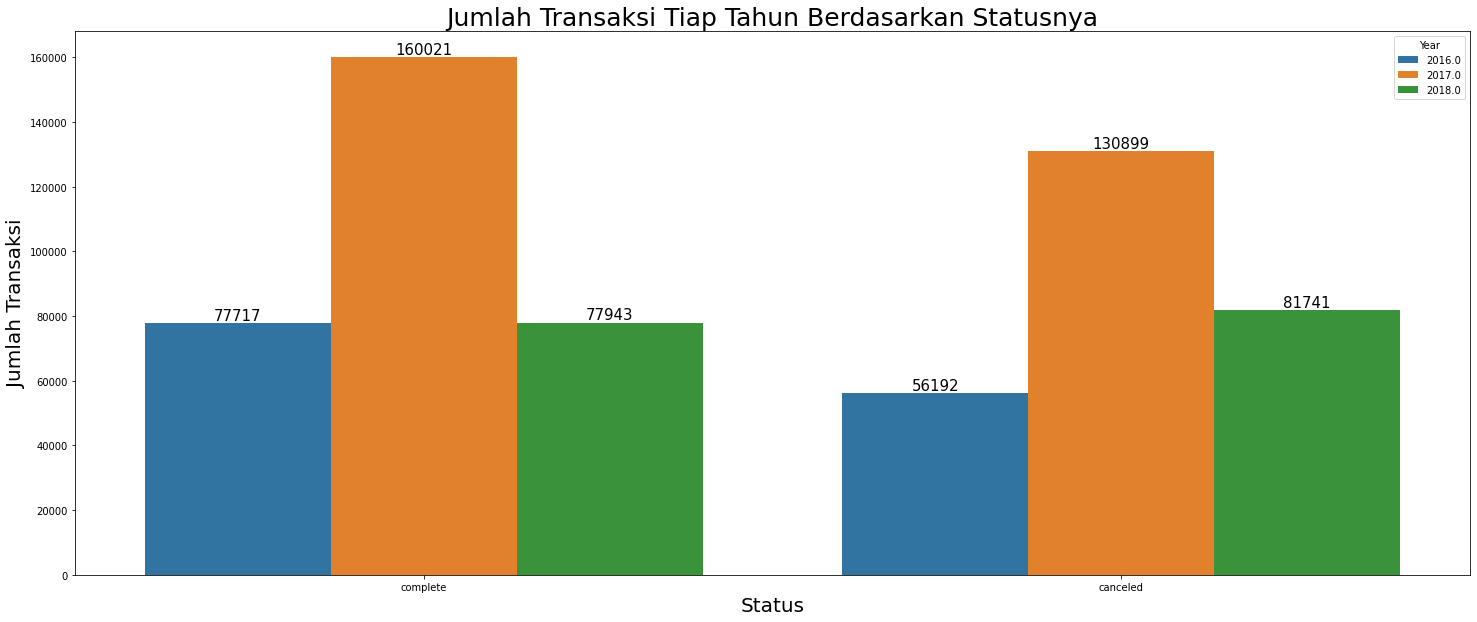

In [62]:
plt.figure(figsize=(25, 10))

ax = sns.countplot(data=df, x='status' ,hue='Year')

for bar in ax.patches:
	ax.annotate(format(bar.get_height(), '.0f'),
				  (bar.get_x() + bar.get_width() / 2,
					bar.get_height()), 
                    ha='center', 
                    va='center',
				    size=15, xytext=(0, 8),
				    textcoords='offset points')

plt.title('Jumlah Transaksi Tiap Tahun Berdasarkan Statusnya', size=25)
plt.xlabel('Status', size=20)
plt.ylabel('Jumlah Transaksi', size=20)

plt.show()

Berdasarkan grafik di atas dapat di simpulkan bahwa transaksi transaksi produk di e-commerce terdiri dari 2 status yaitu 'complete' dan 'canceled', dengan rincian :
- pada tahun 2016 terdapat 133909 transaksi dengan 77717 status 'complete' dan 56192 status 'canceled'
- pada tahun 2017 terdapat kenaikan transaksi produk sekitar 290920 transaksi dengan 160021 status 'complete' dan 130899 status 'canceled'
- pada tahun 2018 terdapat penurunan transaksi produk sekitar 159684 transaksi dengan 77943 status 'complete' dan 81741 status 'canceled'

## Jumlah Total Transaksi Berdasarkan Statusnya

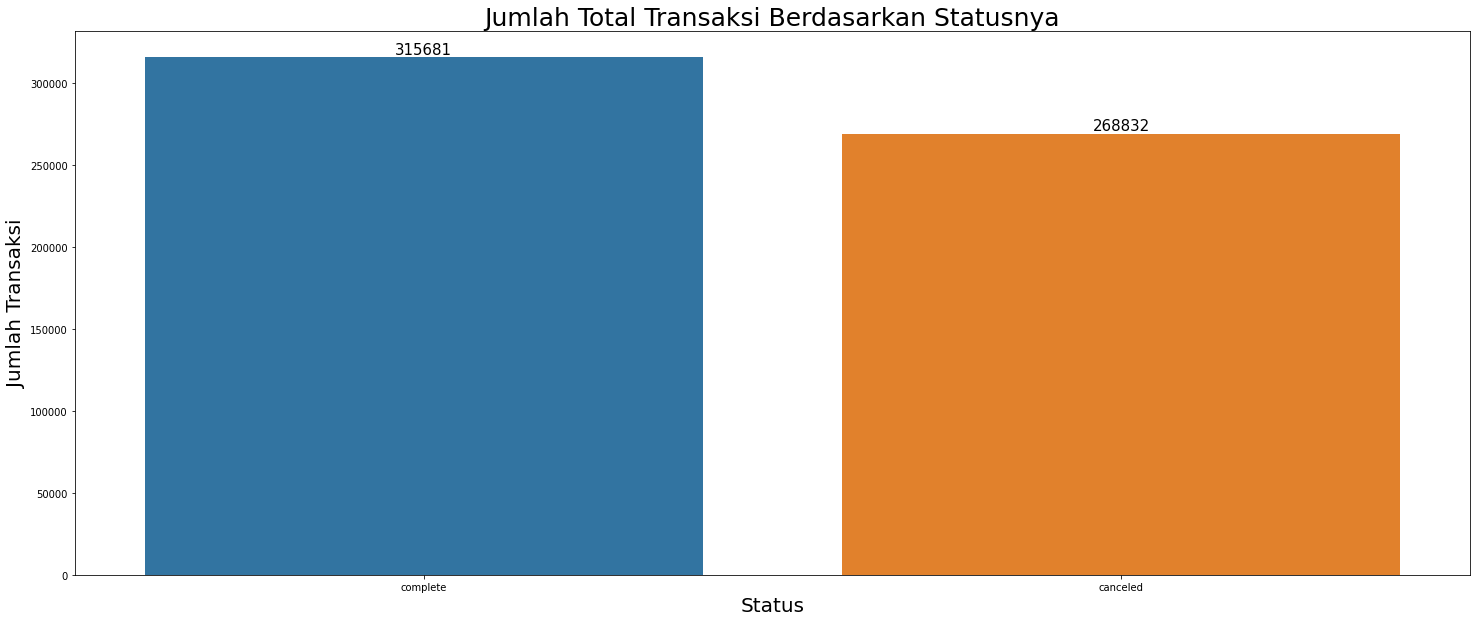

In [63]:
plt.figure(figsize=(25, 10))

ax = sns.countplot(data=df, x='status')

for bar in ax.patches:
	ax.annotate(format(bar.get_height(), '.0f'),
				  (bar.get_x() + bar.get_width() / 2,
					bar.get_height()), 
                    ha='center', 
                    va='center',
				    size=15, xytext=(0, 8),
				    textcoords='offset points')

plt.title('Jumlah Total Transaksi Berdasarkan Statusnya', size=25)
plt.xlabel('Status', size=20)
plt.ylabel('Jumlah Transaksi', size=20)

plt.show()

### Membandingkan Total Transaksi Menggunakan Two Sample T-test

In [35]:
df[df['status']=='complete']['qty_ordered'].var()

8.511290769295156

In [36]:
df[df['status']=='canceled']['qty_ordered'].var()

24.720884417126832

In [37]:
stat, pvalue = ttest_ind(
    a= df[df['status']=='complete']['qty_ordered'],
    b= df[df['status']=='canceled']['qty_ordered'],
    equal_var= True,
    alternative='two-sided' # two tail
)

pvalue

3.737289643246934e-20

In [64]:
if pvalue > 0.05:
    print(f'''
    pvalue={pvalue}. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti kalau jumlah transaksi yang bersatus 'complete' tidak sama dengan transaksi yang berstatus 'canceled'.
    (transaksinya tidak berbeda signifikan)
    ''')
else:
    print(f'''
    pvalue={pvalue}. pvalue <= 0.05. Berhasil menolak Ho.
    Kita Punya cukup bukti kalau jumlah transaksi yang bersatus 'complete' tidak sama dengan transaksi yang berstatus 'canceled'.
    (transaksinya berbeda signifikan)
    ''')


    pvalue=3.737289643246934e-20. pvalue <= 0.05. Berhasil menolak Ho.
    Kita Punya cukup bukti kalau jumlah transaksi yang bersatus 'complete' tidak sama dengan transaksi yang berstatus 'canceled'.
    (transaksinya berbeda signifikan)
    


Dari hasil perbandingan di atas terlihat bahwa transaksi produk dengan status 'complete' lebih banyak dan jumlah transaksinya berbeda signifikan terhadap transaksi produk dengan status 'canceled'. Dengan perbedaan sekitar 46849 transaksi dari tahun 2016 sampai 2018.

## Banyak Produk Terjual per Tahun Berdasarkan Kategori

### Mencari data barang yang terjual

In [39]:
df_co = df[df['status']=='complete']
df_ca = df[df['status']=='canceled']

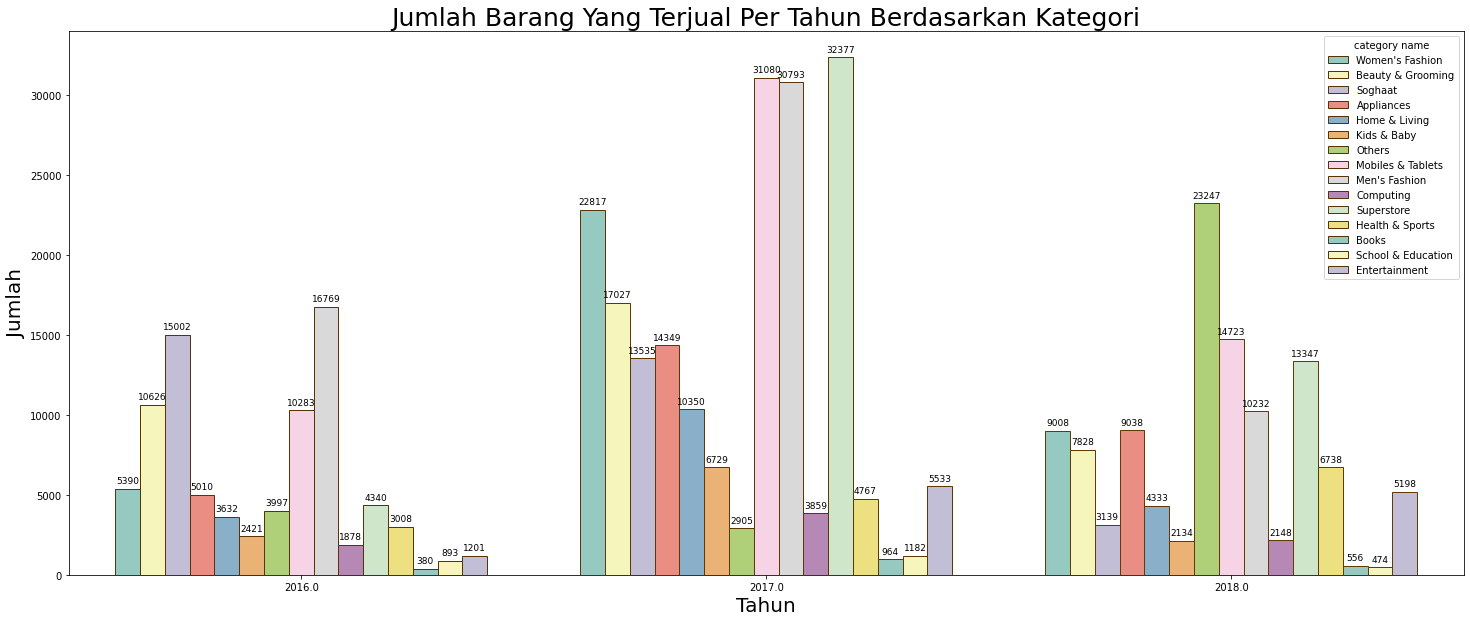

In [56]:
plt.figure(figsize=(25, 10))

ax = sns.barplot(data=df_co, x='Year', y='qty_ordered',hue='category name', ci=0 ,estimator=sum,edgecolor=sns.color_palette("BrBG", 100),palette = 'Set3')

for bar in ax.patches:
	ax.annotate(format(bar.get_height(), '.0f'),
				  (bar.get_x() + bar.get_width() / 2,
					bar.get_height()), 
                    ha='center', 
                    va='center',
				    size=9, xytext=(0, 8),
				    textcoords='offset points')

plt.title('Jumlah Barang Yang Terjual Per Tahun Berdasarkan Kategori', size=25)
plt.xlabel('Tahun', size=20)
plt.ylabel('Jumlah', size=20)
plt.show()

Dari data di atas dapat disimpulkan :
- Penjualan terbanyak terjadi di tahun 2017 dengan peningkatan rata-rata dari tahun sebelumnya di tiap kategorinya terutama untuk produk kategori 'Women's Fashion','Mobiles & Tablets','Men's Fashion' dan 'Superstore'. Dengan Penjualan tertinggi ada pada kategori 'Superstore' sebanyak 32377 produk terjual
- Pada tahun 2018 terjadi peningkatan yang signifikan pada kategori 'Others' sebanyak 23247 produk telah terjual


## Jumlah total barang terjual di tahun 2016 - 2018 berdasarkan kategori produk

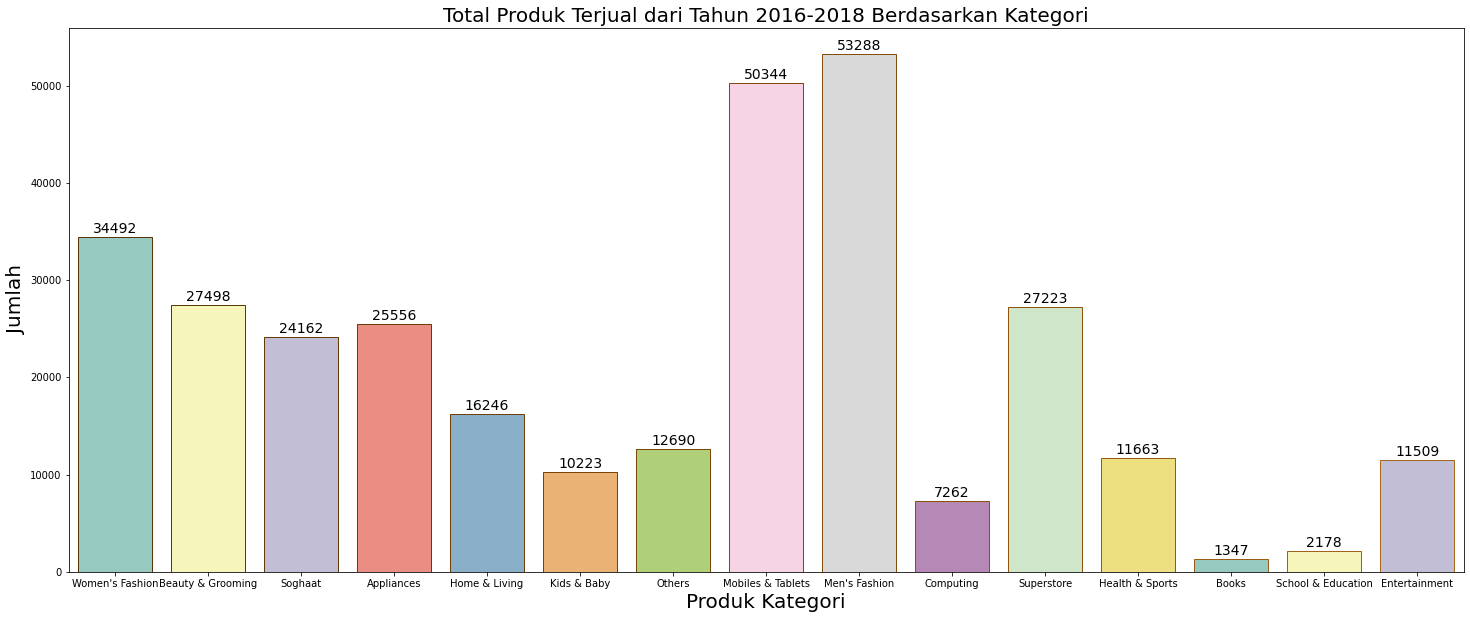

In [54]:
plt.figure(figsize=(25, 10))

ax = sns.countplot(data=df_co, x='category name', edgecolor=sns.color_palette("BrBG", 100),palette = 'Set3')

for bar in ax.patches:
	ax.annotate(format(bar.get_height(), '.0f'),
				  (bar.get_x() + bar.get_width() / 2,
					bar.get_height()), 
                    ha='center', 
                    va='center',
				    size=14, xytext=(0, 8),
				    textcoords='offset points')

plt.title('Total Produk Terjual dari Tahun 2016-2018 Berdasarkan Kategori', size=20)
plt.xlabel('Produk Kategori', size=20)
plt.ylabel('Jumlah', size=20)
plt.show()


Untuk kategori penjualan terbanyak di tahun 2016 sampai 2018 ada pada kategori 'Men's Fashion' dengan produk terjual sekitar 53288 produk, posisi kedua ada pada kategori 'Mobiles & Tablets' dengan jumlah produk terjual 50344 buah dan untuk posisi ke tiga ada pada kategori produk 'women's Fashion' dengan jumlah produk terjual sebanyak 34492 buah.

## Jumlah total barang yang di cancel atau di batalkan di tahun 2016 - 2018 berdasarkan kategori produk

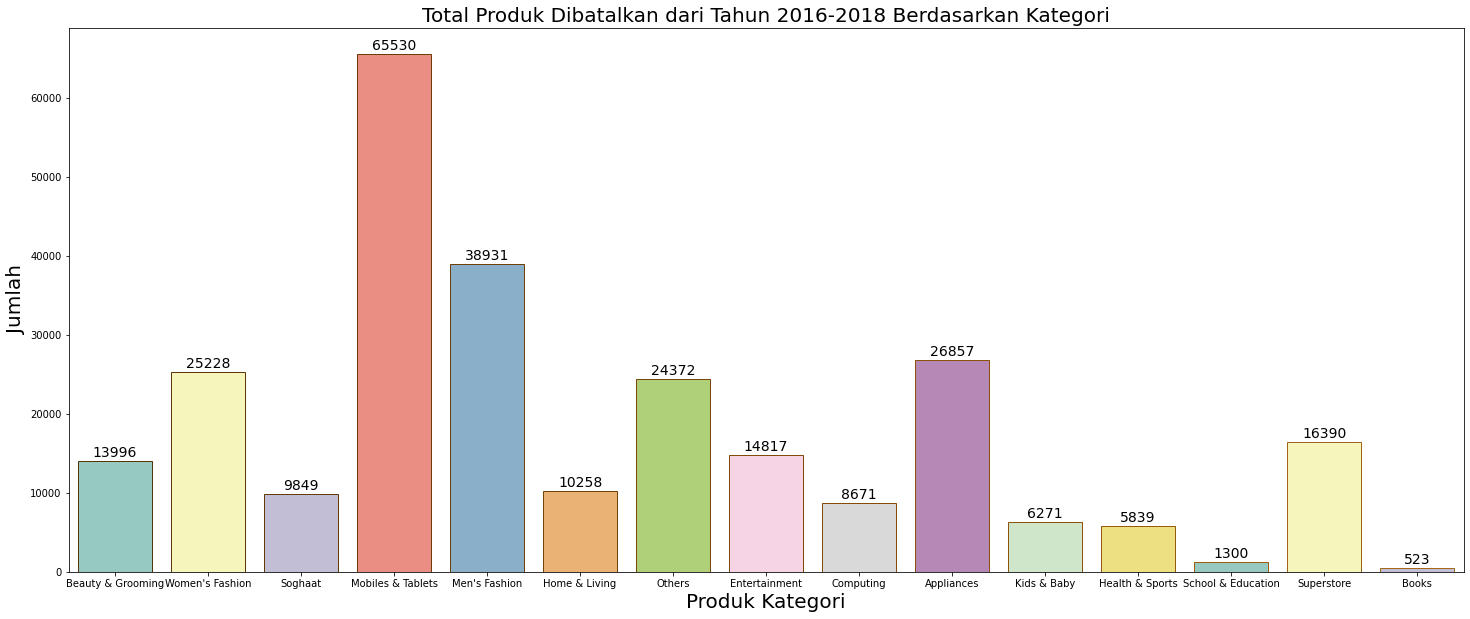

In [42]:
plt.figure(figsize=(25, 10))

ax = sns.countplot(data=df_ca, x='category name', edgecolor=sns.color_palette("BrBG", 100),palette = 'Set3')

for bar in ax.patches:
	ax.annotate(format(bar.get_height(), '.0f'),
				  (bar.get_x() + bar.get_width() / 2,
					bar.get_height()), 
                    ha='center', 
                    va='center',
				    size=14, xytext=(0, 8),
				    textcoords='offset points')

plt.title('Total Produk Dibatalkan dari Tahun 2016-2018 Berdasarkan Kategori', size=20)
plt.xlabel('Produk Kategori', size=20)
plt.ylabel('Jumlah', size=20)
plt.show()


Untuk kategori produk yang di batalkan di tahun 2016 sampai 2018 paling banyak ada pada kategori 'Mobiles & Tablets' dengan produk dibatalkan sekitar 65530 produk, posisi kedua ada pada kategori 'Mens Fashion' dengan jumlah produk dibatalkan sekitar 38931 buah dan untuk posisi ke tiga ada pada kategori produk 'Appliance' dengan jumlah produk dibatalkan sebanyak 26857 buah.

## Metode Pembayaran yang digunakan

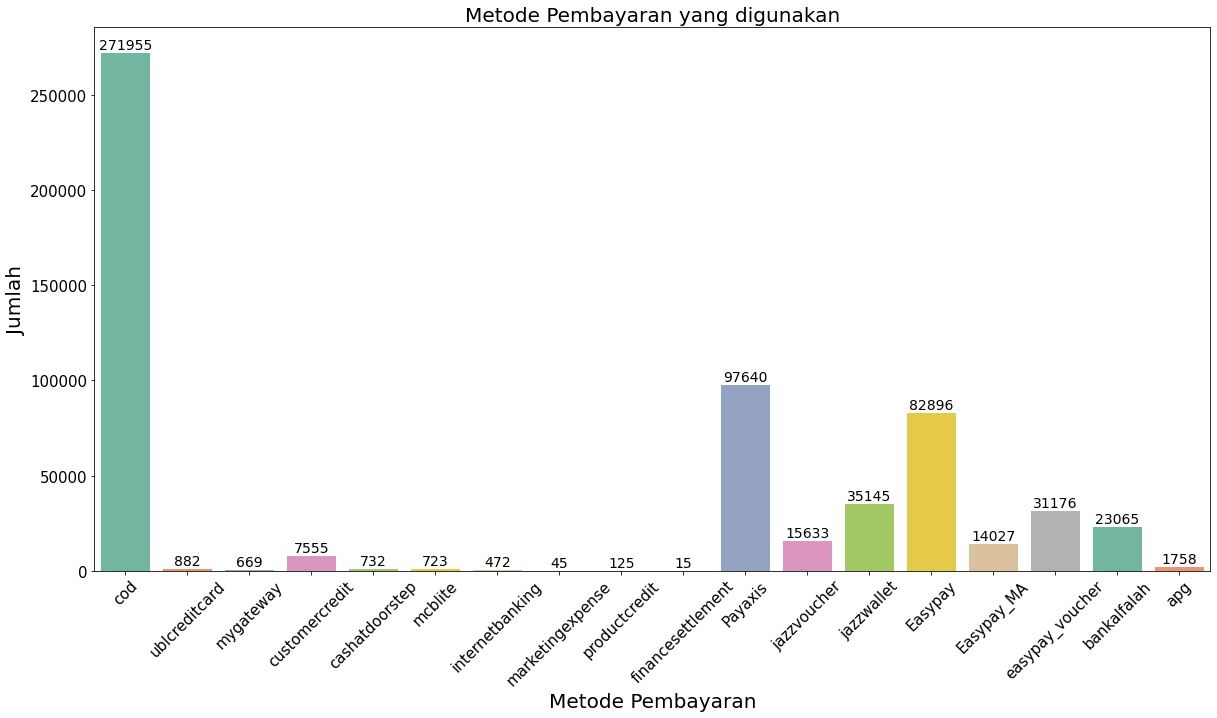

In [43]:
plt.figure(figsize=(20, 10))

ax = sns.countplot(data=df, x='payment_method',palette = 'Set2')

for bar in ax.patches:
	ax.annotate(format(bar.get_height(), '.0f'),
				  (bar.get_x() + bar.get_width() / 2,
					bar.get_height()), 
                    ha='center', 
                    va='center',
				    size=14, xytext=(0, 8),
				    textcoords='offset points')

plt.title('Metode Pembayaran yang digunakan', size=20)
plt.xlabel('Metode Pembayaran', size=20)
plt.ylabel('Jumlah', size=20)
plt.xticks(size=15, rotation=45)
plt.yticks(size=15)
plt.show()

In [44]:
cod = len(df[df['payment_method']=='cod'])
inter = len(df[df['payment_method']=='internetbanking'])
ldata = len(df)
h = (cod/ldata)*100
i = (inter/ldata)*100

print(f'Pembayaran COD sebanyak : {cod}')
print(f'Persentase COD sebesar : {h}')
print(f'Persentase Internet Banking sebesar : {i}')


Pembayaran COD sebanyak : 271955
Persentase COD sebesar : 46.52676672717288
Persentase Internet Banking sebesar : 0.08075098415261936


Dapat disimpulkan bahwa :
- Jumlah yang menggunakan pembayaran COD merupakan metode pembayaran paling banyak digunakan yaitu sekitar 271955 pembayaran
- Berarti metode pembayaran melalui COD memiliki persentase sekitar 46.52 % atau sekitar 271955 pembayaran dari keseluruhan metode pembayaran yang bisa digunakan pada tahun 2016 sampai 2018
- Terlihat untuk pembayaran yang menggunakan media cashless sangat jarang di gunakan jika dibandingkan dengan metode COD, bahkan untuk internet banking saja hanya menyumbang 0.08075 % atau 45 pembayaran dari metode pembayaran yang bisa digunakan.

## Rata-rata diskon yang diberikan berdasarkan metode pembayaran nya

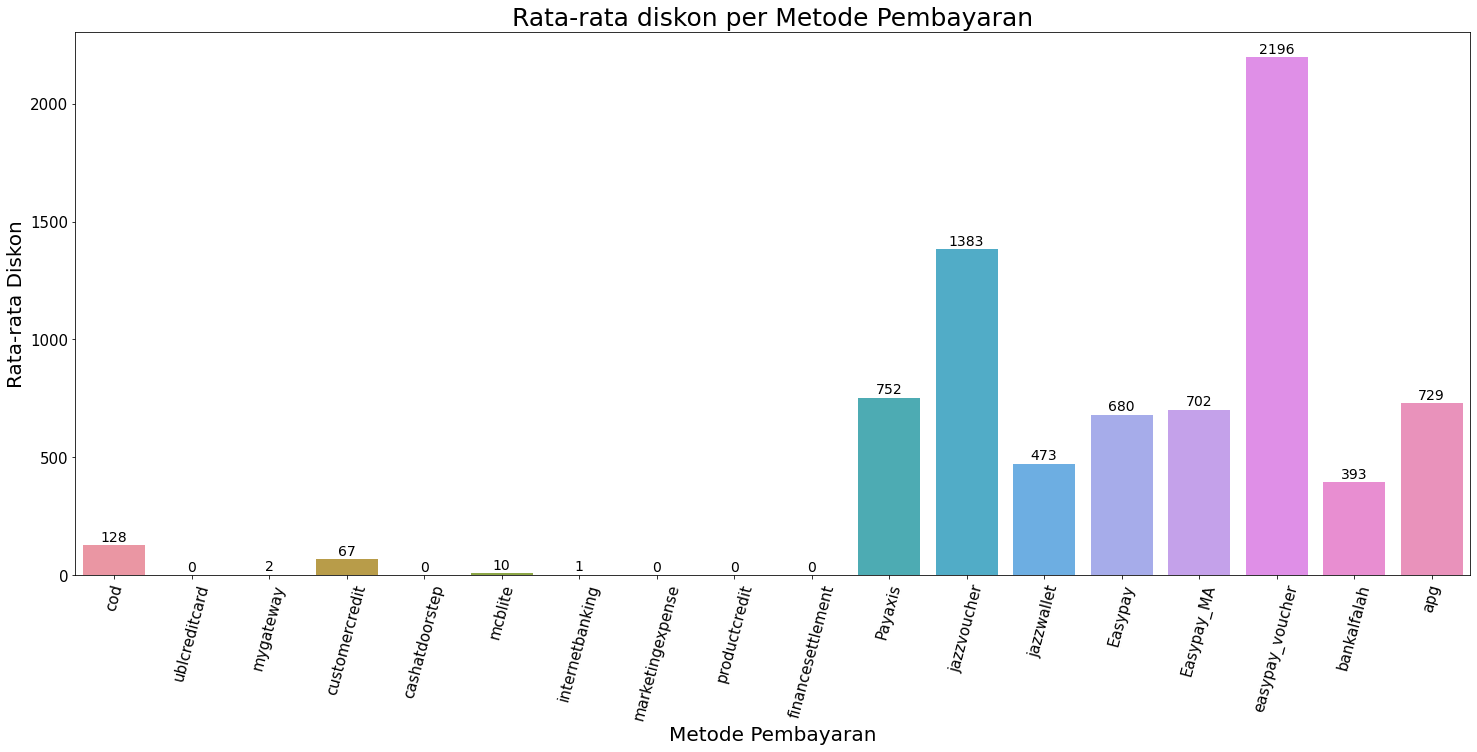

In [45]:
plt.figure(figsize=(25, 10))

ax = sns.barplot(data=df, x='payment_method', y='discount_amount',ci=0 )

for bar in ax.patches:
	ax.annotate(format(bar.get_height(), '.0f'),
				  (bar.get_x() + bar.get_width() / 2,
					bar.get_height()), 
                    ha='center', 
                    va='center',
				    size=14, xytext=(0, 8),
				    textcoords='offset points')

plt.title('Rata-rata diskon per Metode Pembayaran', size=25)
plt.xlabel('Metode Pembayaran', size=20)
plt.ylabel('Rata-rata Diskon', size=20)
plt.xticks(size=15, rotation=75)
plt.yticks(range(0,2500,500),size=15)

plt.show() 

Dari data di atas dapat di simpulkan bahwa rata-rata diskon terbesar di berikan kepada yang melakukan metode pembayaran nya menggunakan 'easypay_voucher', yang di mana akan mendapatkan rata-rata diskon sebesar 2196. 

In [46]:
# Membuat Dataframe dengan produk terjual berdasarkan 'category name' dan nilai terbesar yaitu 'Men's Fashion'
dfs = df_co[df_co['category name']=='Men\'s Fashion']
dfs

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category name,sales_commission_code,discount_amount,payment_method,BI Status,MV,Year,Month,Customer ID
197,211347.0,complete,7/1/2016,bata_comfit-8614096-43-9,599.0,1.0,599.0,100147593,Men's Fashion,Unknown,0.0,cod,Net,599,2016.0,7.0,62.0
198,211345.0,complete,7/1/2016,bata_comfit-8614096-41-7,599.0,1.0,599.0,100147592,Men's Fashion,7828,0.0,cod,Net,599,2016.0,7.0,63.0
242,211392.0,complete,7/1/2016,MYWALET_MW-012-BLACK,455.0,1.0,455.0,100147629,Men's Fashion,Unknown,0.0,cod,Net,455,2016.0,7.0,74.0
253,211405.0,complete,7/1/2016,PucaM_FLASH-BLACK-45,1200.0,1.0,1000.0,100147637,Men's Fashion,C-FSD-42225,200.0,cod,Net,"1,200",2016.0,7.0,80.0
317,211476.0,complete,7/1/2016,ajmery_AJ-123-L,999.0,1.0,999.0,100147690,Men's Fashion,Unknown,0.0,cod,Net,999,2016.0,7.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584507,905189.0,complete,8/28/2018,MEFCUR5B716B0A6B670,499.0,1.0,649.0,100562374,Men's Fashion,Unknown,0.0,bankalfalah,Gross,499,2018.0,8.0,1195.0
584508,905190.0,complete,8/28/2018,MEFCUR5B716B0A6B670,499.0,1.0,649.0,100562375,Men's Fashion,Unknown,0.0,bankalfalah,Gross,499,2018.0,8.0,1195.0
584509,905191.0,complete,8/28/2018,MEFCOT5A8D1E973B886,399.0,1.0,549.0,100562376,Men's Fashion,Unknown,0.0,cod,Valid,399,2018.0,8.0,115324.0
584514,905196.0,complete,8/28/2018,MEFGUL5A9F882AA5B99-36,1299.0,1.0,0.0,100562381,Men's Fashion,Unknown,0.0,customercredit,Valid,"1,299",2018.0,8.0,111132.0


## Metode Pembayaran Yang Digunakan Untuk Produk Terjual Kategori Men\'s Fashion

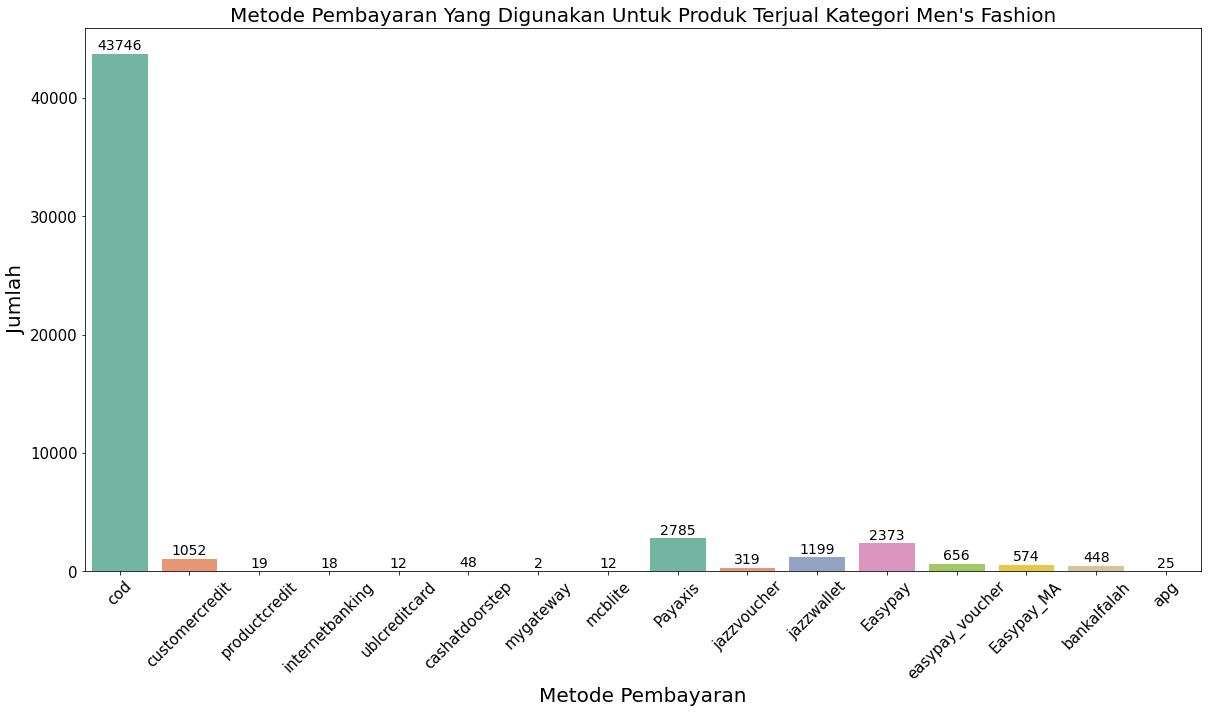

In [47]:
plt.figure(figsize=(20, 10))
ax = sns.countplot(data=dfs, x='payment_method' ,palette = 'Set2')

for bar in ax.patches:
	ax.annotate(format(bar.get_height(), '.0f'),
				  (bar.get_x() + bar.get_width() / 2,
					bar.get_height()), 
                    ha='center', 
                    va='center',
				    size=14, xytext=(0, 8),
				    textcoords='offset points')

plt.title('Metode Pembayaran Yang Digunakan Untuk Produk Terjual Kategori Men\'s Fashion', size=20)
plt.xlabel('Metode Pembayaran', size=20)
plt.ylabel('Jumlah', size=20)
plt.xticks(size=15, rotation=45)
plt.yticks(size=15)
plt.show()

In [48]:
# Mencari total pembayaran produk terjual kategori Men's Fashion
dfs['payment_method'].value_counts().sum()

53288

Berdasarkan data di atas dapat disimpulkan bahwa produk yang paling banyak terjual pada periode 2016-2018 yaitu 'Men's Fashion' paling banyak menggunakan metode pembayaran 'COD' sekitar 43746 kali dari total 53288 pembayaran

## Rata-rata Diskon Yang di Berikan untuk Produk Terjual Berdasarkan Metode Pembayaran

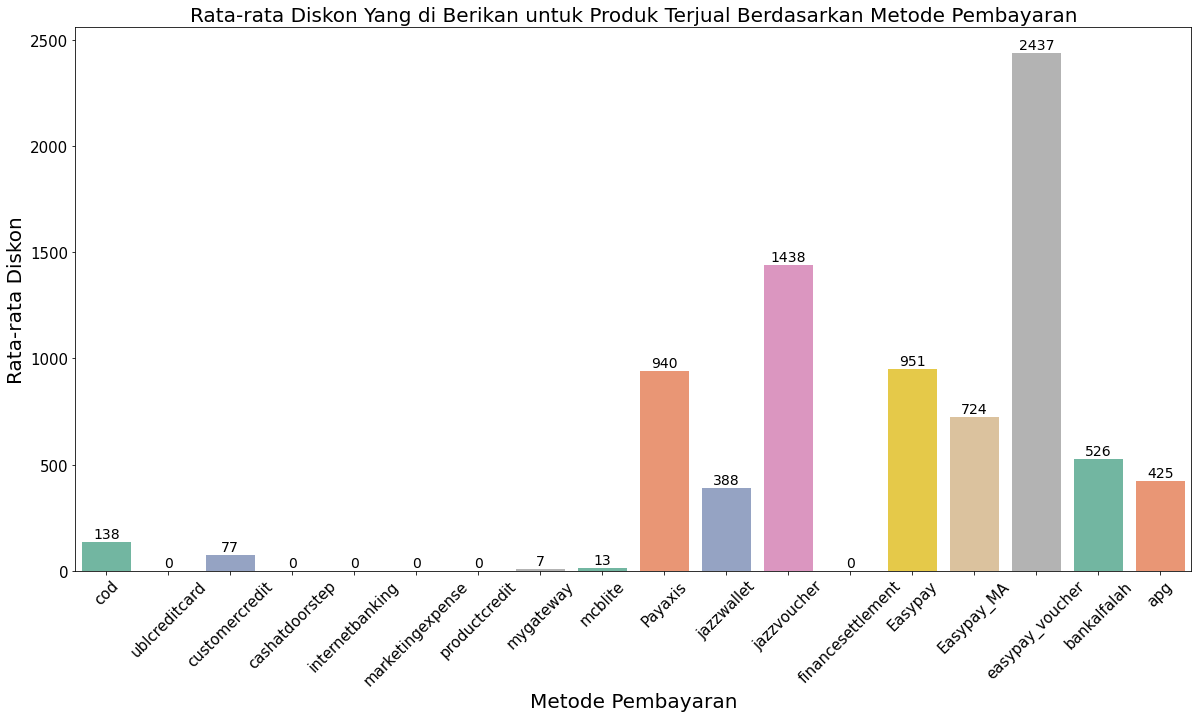

In [57]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(data=df_co, x='payment_method' ,y='discount_amount',ci=0,palette = 'Set2')

for bar in ax.patches:
	ax.annotate(format(bar.get_height(), '.0f'),
				  (bar.get_x() + bar.get_width() / 2,
					bar.get_height()), 
                    ha='center', 
                    va='center',
				    size=14, xytext=(0, 8),
				    textcoords='offset points')


plt.title('Rata-rata Diskon Yang di Berikan untuk Produk Terjual Berdasarkan Metode Pembayaran', size=20)
plt.xlabel('Metode Pembayaran', size=20)
plt.ylabel('Rata-rata Diskon', size=20)
plt.xticks(size=15, rotation=45)
plt.yticks(size=15)
plt.show()

Dari data di atas dapat disimpulkan bahwa rata-rata diskon diberikan kepada metode pembayaran yang menggunakan media virtual dan voucher, sedangkan untuk metode pembayaran COD terlihat tidak terlalu sering digunakan untuk metode pembayaran.

In [60]:
# Seve file ke .csv
df.to_csv('Clear Pakistan Largest Ecommerce Dataset.csv')
df_co.to_csv('Data Produk Terjual.csv')
df_ca.to_csv('Data Produk Tidak Terjual.csv')
dfs.to_csv('Data Terjual KAtegori Men\'s Fashion.csv')

# Kesimpulan

- Pertumbuhan transaksi produk dari e-commerce tersebut meningkat di tahun 2017 sebesar 144% tetapi kemudian menurun di tahun 2018 sebesar 32%
- Pembatalan pembelian di hampir setiap tahun di e-commerce tersebut mencapai setengah dari transaksi, tetapi dari total transaksi dari tahun 2016 sampai 2018 transaksi produk masih lebih banyak di banding dengan transaksi dengan pembatalan.
-  Transaksi terbanyak terjadi di tahun 2017 dengan kategori produk 'Women Fashion'. 
- Untuk kategori produk terjual dari tahun 2016 sampai 2018 ada pada kategori 'Men's Fashion' dengan produk terjual sekitar 53288 produk. dan untuk produk yang di batalkan ada pada kategori 'Mobiles & Tablets'.
- Untuk pembayaran transaksi pada e-commerce tersebut paling banyak di dominasi dengan metode 'COD sekitar 271955 pembayaran atau sekitar 46.52% dari total keseluruhan pembayaran. berbanding terbalik dengan metode cashless yang masih belum banyak di gunakan.
- Untuk diskon rata-rata di berikan kepada metode yang menggunakan cashless, seperti 'easypay_voucher' yang mendapat rata-rata diskon sebesar 2196.

# Rekomendasi
Dari data dan kesimpulan di atas dapat di lihat bahwa informasi tentang diskon yang di dapat dari pembayaran menggunakan media cashless masih kurang di terima oleh pembeli e-commerce tersebut dari pada pembayaran menggunakan metode COD, sehingga di harapkan untuk informasi mengenai diskon tersebut lebih di sebarluaskan sehingga akan di terima oleh sebagaian pengguna dari e-commerce tersebut. dan di harapkan akan terjadi pertumbuhan pembelian pada e-commerce tersebut 
 
